In [5]:
from lightkurve import search_targetpixelfile
pixelfile = search_targetpixelfile(8462852, quarter=16).download(quality_bitmask='hardest');

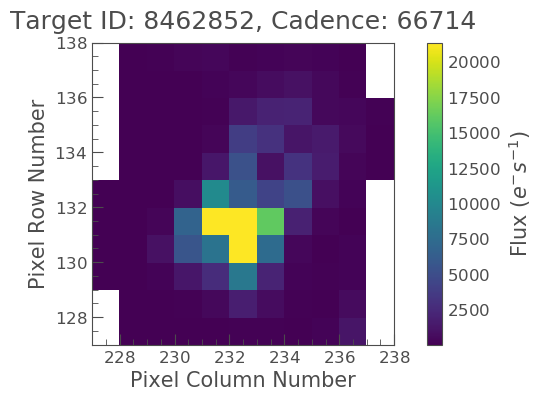

In [6]:
pixelfile.plot(frame=1)

In [ ]:
import lightkurve as lk
from matplotlib.pyplot import *
import matplotlib.pyplot as plt
star1='KIC5950854'
star2='KIC6106415'
star3='KIC6116048'
star4='KIC6225718'
star5='KIC6603624'
star6='KIC6933899'
# Search MAST archive for Kepler data
search = lk.search_lightcurvefile(a, cadence = 'short', mission = 'kepler')

# Show result
print(search)

# Download all the data
LCs = search.download_all()

# Use the PDCSAP_FLUX variant of the data
LCs = LCs.PDCSAP_FLUX

# Stitch the light curves together
LCs = LCs.stitch()

# Plot the result
LCs.plot()

In [ ]:
# Create trimmed down light curve, 
LC_trim = LCs.remove_nans()
LC_trim.plot()
LC_trim = LC_trim.flatten(401)

LC_trim = LC_trim.remove_outliers(5)

# Plot the result
LC_trim.plot()

# Compute the power spectrum (periodogram) Lomb-Scargle
pg = LC_trim.to_periodogram(normalization = 'psd')

# Output to numpy arrays
f,p = pg.frequency.value, pg.power.value

# Plot the power spectrum
figure(figsize = (16,9))
plot(f,p)
xlim(2500,4500)
ylim(1e-13, 2e-11)

# Save to file
import numpy as np
np.savetxt('mypowerspectrum.pow', list(zip(f,p)), header = 'Frequency [muHz], Power[ppm^2/muHz]')

In [ ]:
# Create trimmed down light curve, 
LC_trim = LCs.remove_nans()
LC_trim = LC_trim.flatten(1001)
LC_trim1 = LC_trim.remove_outliers(5)
# Plot the result
#LC_trim.plot()

# Compute the power spectrum (periodogram) Lomb-Scargle
pg1 = LC_trim1.to_periodogram(normalization = 'psd')
# Output to numpy arrays
f1,p1 = pg1.frequency.value, pg1.power.value

# Plot the power spectrum
figure(figsize = (16,9))
plot(f,p)
xlim(2500,4500)
ylim(1e-13, 2e-11)
plt.show()
plot(f,p)
#xlim(2500,4500)
#ylim(1e-13, 2e-11)
plt.show()


# Save to file
import numpy as np
np.savetxt('mypowerspectrum.pow', list(zip(f,p)), header = 'Frequency [muHz], Power[ppm^2/muHz]')